# Programming and Scripting Project:
## Analysis of Fisher's Iris Dataset
*Author: Eoghan Walsh*
***

## Import the Python Modules

Import the python modules [pandas](https://pandas.pydata.org/), [numpy](https://numpy.org/), [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/pyplot.html) and [seaborn](https://seaborn.pydata.org/index.html) to analyse and plot the data.

In [85]:
# Import python modules pandas, matplotlib.pyplot, seaborn and numpy.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the Iris Dataset

Load the dataset using pandas. The dataset is sourced from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris).

In [86]:
# Import the Iris data set to a pandas DataFrame and add column headers.
# Adapted from:
# https://sparkbyexamples.com/pandas/pandas-add-header-row-to-dataframe/.
column_names = ("sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                "petal_width_cm", "class")

iris = pd.read_csv("iris.csv", names=column_names)

## About the Iris Dataset

[Fisher's Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) consists of 150 samples of Iris flower with fifty samples from each of three species: setosa, versicolor and virginica. There are four measurements from each flower: petal length and width, and sepal length and width. The dataset was made famous by British statistician and biologist Ronald Fisher.

In [87]:
# Show first 5 rows of the dataset.
iris.head(5)

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
# Show the shape of the dataset.
print(f"Rows, Columns: {iris.shape}")

Rows, Columns: (150, 5)


In [89]:
# Show count of each species of iris.
iris["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Project

### 1. Output Summary of the Variables to a Text File

In [90]:
# 1. OUTPUT A SUMMARY OF EACH VARIABLE TO A SINGLE TEXT FILE.

# Create the filename.
FILENAME = "iris_variable_summary.txt"


# Function to write the summary stats to a text file.
def variable_summary():

    # Generate summary statistics for each variable and convert to string
    # so it can be written to a text file.
    # References:
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html.
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html.
    summary = iris.describe().to_csv()

    # Write summary statistics to txt file.
    with open(FILENAME, "w", newline="") as f:
        f.write(summary)


# Call the function.
variable_summary()

# Show the summary statistics.
iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2. Save Histogram of Each Variable to a PNG File

In [91]:
# 2. SAVE A HISTOGRAM OF EACH VARIABLE TO PNG FILES.

# Function to save histograms to png files.
def histogram_png():

    # List of variables for the histograms.
    variables_hist = ("sepal_length_cm", "sepal_width_cm", "petal_length_cm",
                      "petal_width_cm")

    # Subsets of the data set by class.
    setosa_hist = iris["class"] == "Iris-setosa"
    versicolor_hist = iris["class"] == "Iris-versicolor"
    virginica_hist = iris["class"] == "Iris-virginica"

    # For loop to create histogram for each variable.
    for var in variables_hist:

        # Use matplotlib subplots to create the histogram.
        fig, ax = plt.subplots()

        # Select plot type, data, label, bar colour, transparency.
        ax.hist(iris[setosa_hist][var], label="Setosa",
                color="tab:green", alpha=0.5)

        ax.hist(iris[versicolor_hist][var], label="Versicolor",
                color="tab:orange", alpha=0.5)

        ax.hist(iris[virginica_hist][var], label="Virginica",
                color="tab:blue", alpha=0.5)

        # Set the axis labels.
        x_label_hist = var.replace("_", " ").replace("cm", "(in centimetres)")
        ax.set_xlabel(x_label_hist)
        ax.set_ylabel("frequency")

        # Set the title.
        title_hist = var.replace("_", " ").replace(" cm", "s").title()
        ax.set_title(f"Iris {title_hist} per Class")

        # Add legend.
        ax.legend()

        # Save each histogram as png file.
        plt.savefig(f"{var}_hist.png")

        # Close each figure.
        plt.close()


# Call the function.
histogram_png()

Sample histogram output.

<div>
<img src="petal_length_cm_hist.png" alt="Petal Length Histogram" style="width:400px;"/>
</div>

### 3. Output a Scatter Plot of Each Pair of Variables

#### seaborn pairplot

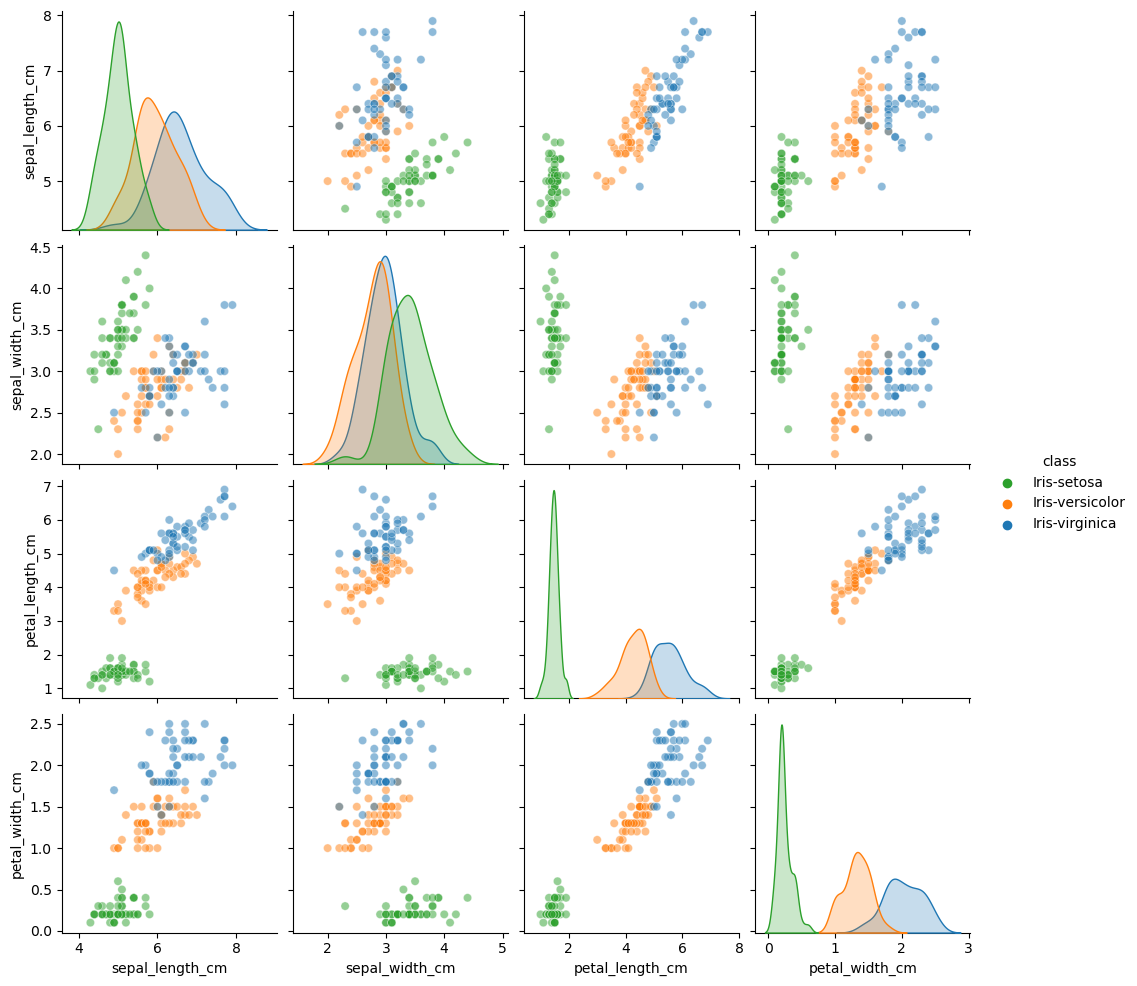

In [92]:
# Funtion to output seaborn pairplot.
def iris_pairplot():

    # Dictionary of colours for the pairplot.
    colours_pairplot = {"Iris-setosa": "tab:green",
                        "Iris-versicolor": "tab:orange",
                        "Iris-virginica": "tab:blue"}
    
    # Filter warnings due to bug:
    # https://github.com/matplotlib/matplotlib/issues/26290.
    import warnings
    warnings.filterwarnings('ignore')

    # Use seaborn pairplot to generate one figure containing all scatter plots
    # for each pair of variables.
    # Adapted from:
    # https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn-pairplot.
    # https://stackoverflow.com/a/47200170
    sns.pairplot(iris, hue="class", palette=colours_pairplot,
                 plot_kws={"alpha": 0.5})
    # Show plot.
    plt.show()


# Call the function.
iris_pairplot()

#### matplotlib plots

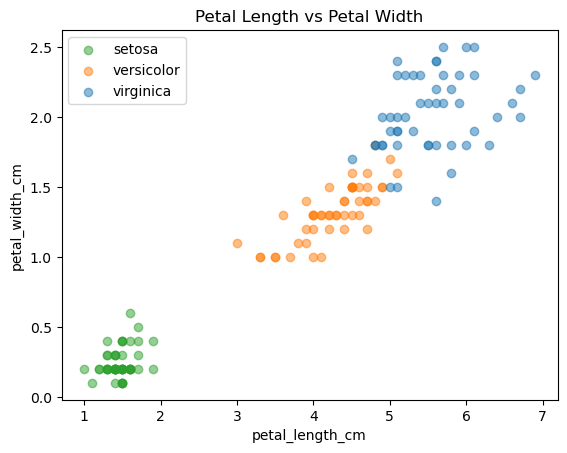

In [93]:
# Funtion to output scatter plots for each pair of variables.
def all_plots():

    # List of variables for the plots.
    variables_plot = ("sepal_length_cm", "sepal_width_cm",
                      "petal_length_cm", "petal_width_cm")

    # Subsets of the data set by class.
    setosa_plot = iris["class"] == "Iris-setosa"
    versicolor_plot = iris["class"] == "Iris-versicolor"
    virginica_plot = iris["class"] == "Iris-virginica"

    # Nested for loop to run through each pair of variables with
    # continue statement to skip when x equals y. Will generate separate
    # figure for each scatter plot.
    # Reference: https://www.w3schools.com/python/python_for_loops.asp
    for x_var in variables_plot:
        for y_var in variables_plot:
            if x_var == y_var:
                continue
            # Use matplotlib subplots to create the histogram.
            fig, ax = plt.subplots()

            # Select plot type, x & y data, label, colour.
            ax.scatter(iris[setosa_plot][x_var],
                       iris[setosa_plot][y_var],
                       label="setosa", color="tab:green", alpha=0.5)

            ax.scatter(iris[versicolor_plot][x_var],
                       iris[versicolor_plot][y_var],
                       label="versicolor", color="tab:orange", alpha=0.5)

            ax.scatter(iris[virginica_plot][x_var],
                       iris[virginica_plot][y_var],
                       label="virginica", color="tab:blue", alpha=0.5)

            # Set the axis labels.
            ax.set_xlabel(x_var)
            ax.set_ylabel(y_var)

            # Set the title.
            x_title_plot = x_var.replace("_", " ").replace(" cm", "").title()
            y_title_plot = y_var.replace("_", " ").replace(" cm", "").title()
            ax.set_title(f"{x_title_plot} vs {y_title_plot} per Class")

            # Add legend.
            ax.legend()

            # Show scatter plots.
            plt.show()


# Function to create scatter plot for one pair of variables.
def single_plot():

    # User to input x variable.
    x = input("Please choose x variable from the following:\n"
              "\tpetal_length_cm\n"
              "\tpetal_width_cm\n"
              "\tsepal_length_cm\n"
              "\tsepal_width_cm\n"
              "Enter x axis variable: ")

    # While loop to prompt user if incorrect variable input.
    # Reference:
    # https://initialcommit.com/blog/python-while-loop-multiple-conditions
    while (x != "petal_length_cm" and x != "petal_width_cm" and
           x != "sepal_length_cm" and x != "sepal_width_cm"):

        x = input("Error. Please choose x variable from the following:\n"
                  "\tpetal_length_cm\n"
                  "\tpetal_width_cm\n"
                  "\tsepal_length_cm\n"
                  "\tsepal_width_cm\n"
                  "Enter x axis variable: ")

    # User to input y variable.
    y = input("Please choose y variable from the following:\n"
              "\tpetal_length_cm\n"
              "\tpetal_width_cm\n"
              "\tsepal_length_cm\n"
              "\tsepal_width_cm\n"
              "Enter y axis variable: ")

    # While loop to prompt user if incorrect variable input.
    while (y != "petal_length_cm" and y != "petal_width_cm" and
           y != "sepal_length_cm" and y != "sepal_width_cm"):

        y = input("Error. Please choose y variable from the following:\n"
                  "\tpetal_length_cm\n"
                  "\tpetal_width_cm\n"
                  "\tsepal_length_cm\n"
                  "\tsepal_width_cm\n"
                  "Enter y axis variable: ")

    # Subsets of the iris dataset by class.
    setosa = iris["class"] == "Iris-setosa"
    versicolor = iris["class"] == "Iris-versicolor"
    virginica = iris["class"] == "Iris-virginica"

    # Title for scatter plot.
    x_title = (x.replace("_", " ").replace(" cm", "").title())
    y_title = (y.replace("_", " ").replace(" cm", "").title())

    # Creat scatter plot.
    fig, ax = plt.subplots()

    ax.scatter(iris[setosa][x], iris[setosa][y], label="setosa",
               color="tab:green", alpha=0.5)

    ax.scatter(iris[versicolor][x], iris[versicolor][y], label="versicolor",
               color="tab:orange", alpha=0.5)

    ax.scatter(iris[virginica][x], iris[virginica][y], label="virginica",
               color="tab:blue", alpha=0.5)

    # Set labels, title and legend.
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"{x_title} vs {y_title}")
    ax.legend()

    # Show plot.
    plt.show()


# Function to display user menu.

def user_menu():
    choice = input("What would you like to do?\n"
                   "\t(a) Generate all plots\n"
                   "\t(b) Generate single plot\n"
                   "Please enter the letter a or b: ")
    return choice


# Main program.

# Call the user menu function.
choice = user_menu()

# Call all plots function.
if choice == "a":
    all_plots()

# Call single plots function.
elif choice == "b":
    single_plot()

### 4. Further Analysis

Scatter plots with regression lines and coefficients.

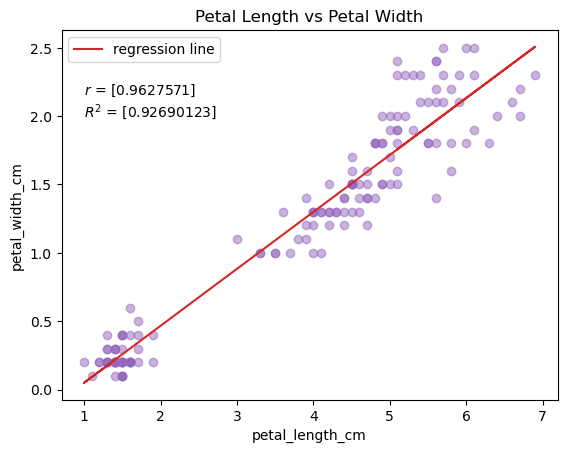

In [94]:
def coefficients_plot(x, y):

    # Get the coefficents for regression line with numpy.
    # Adapted from:
    # https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python#adding-a-matplotlib-regression-line-aregr
    coefficients = np.polyfit(iris[x], iris[y], 1)
    best_fit = np.poly1d(coefficients)

    # Get the correlation coefficient (r) with numpy.
    r = np.corrcoef(iris[x], iris[y])

    # Get the coefficient of determination (R^2).
    r_squared = r ** 2

    # Create plot with matplotlib subplots.
    fig, ax = plt.subplots()

    # Select plot type, x & y data, colour.
    ax.scatter(iris[x], iris[y], color="tab:purple", alpha=0.5)

    # Add regression line to plot.
    ax.plot(iris[x], best_fit(iris[x]), "-", color="tab:red",
            label="regression line")

    # Set title.
    x_title = (x.replace("_", " ").replace(" cm", "").title())
    y_title = (y.replace("_", " ").replace(" cm", "").title())
    ax.set_title(f"{x_title} vs {y_title}")

    # Set axis labels and legend.
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend(loc="upper left")

    # Add coefficients to plot.
    # Reference:
    # https://matplotlib.org/stable/gallery/text_labels_and_annotations/text_fontdict.html
    # https://matplotlib.org/stable/users/explain/text/mathtext.html#subscripts-and-superscripts
    ax.text(iris[x].min(), iris[y].max() - 0.5,
            f"$ r $ = {r[0,1:]}\n$ R^{2} $ = {r_squared[0,1:]}")

    # Show plot.
    plt.show()

# Call the function
coefficients_plot("petal_length_cm", "petal_width_cm")

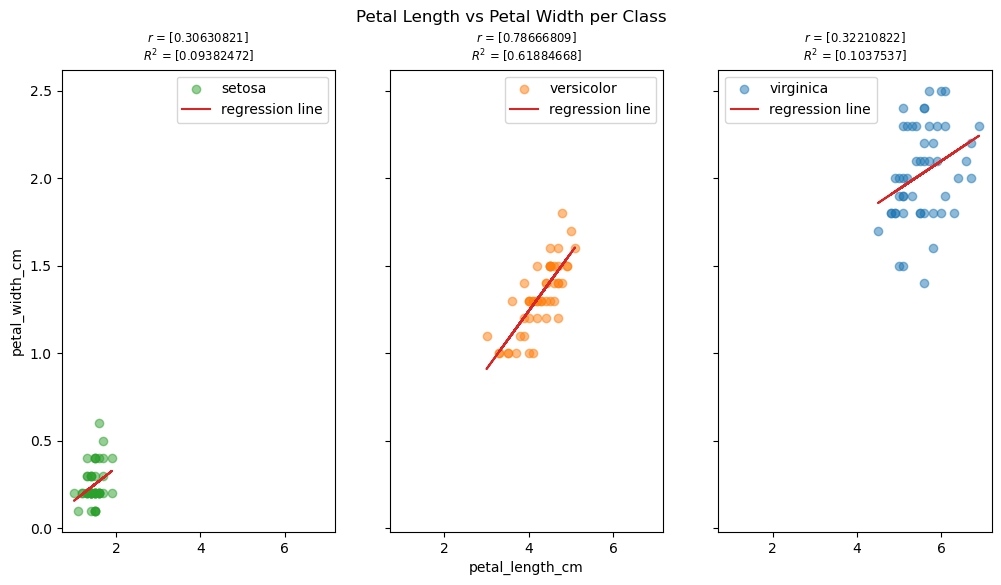

In [95]:
# Function to create scatter plots and add regression lines
# and coefficients for each class.

def coefficients_plot_class(x, y):

    # Get petal lengths and petal widths per class from data set.
    setosa_x = iris[iris["class"] == "Iris-setosa"][x]
    setosa_y = iris[iris["class"] == "Iris-setosa"][y]

    versicolor_x = iris[iris["class"] == "Iris-versicolor"][x]
    versicolor_y = iris[iris["class"] == "Iris-versicolor"][y]

    virginica_x = iris[iris["class"] == "Iris-virginica"][x]
    virginica_y = iris[iris["class"] == "Iris-virginica"][y]

    # Get the coefficents for regression lines with numpy.
    setosa_coefficients = np.polyfit(setosa_x, setosa_y, 1)
    best_fit_setosa = np.poly1d(setosa_coefficients)

    versicolor_coefficients = np.polyfit(versicolor_x, versicolor_y, 1)
    best_fit_versicolor = np.poly1d(versicolor_coefficients)

    virginica_coefficients = np.polyfit(virginica_x, virginica_y, 1)
    best_fit_virginica = np.poly1d(virginica_coefficients)

    # Get the correlation coefficients (r) with numpy.
    setosa_r = np.corrcoef(setosa_x, setosa_y)
    versicolor_r = np.corrcoef(versicolor_x, versicolor_y)
    virginica_r = np.corrcoef(virginica_x, virginica_y)

    # Get the coefficient of determination (R^2).
    setosa_r_sqrd = setosa_r ** 2
    versicolor_r_sqrd = versicolor_r ** 2
    virginica_r_sqrd = virginica_r ** 2

    # Create figure with matplotlib subplots.
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), sharex=True,
                                        sharey=True)

    # Plot setosa.
    ax1.scatter(setosa_x, setosa_y, label="setosa",
                color="tab:green", alpha=0.5)

    # Add regression line.
    ax1.plot(setosa_x, best_fit_setosa(setosa_x), "-",
             color="tab:red", label="regression line")

    # Plot versicolor.
    ax2.scatter(versicolor_x, versicolor_y, label="versicolor",
                color="tab:orange", alpha=0.5)

    # Add regression line.
    ax2.plot(versicolor_x, best_fit_versicolor(versicolor_x), "-",
             color="tab:red", label="regression line")

    # Plot virginica.
    ax3.scatter(virginica_x, virginica_y, label="virginica",
                color="tab:blue", alpha=0.5)

    # Add regression line.
    ax3.plot(virginica_x, best_fit_virginica(virginica_x), "-",
             color="tab:red", label="regression line")

    # Set axis labels, legend, title, text.
    ax1.set_ylabel(y)
    ax1.legend()
    ax1.set_title(f"$ r $ = {setosa_r[0,1:]}\n"
                  f"$ R^{2} $ = {setosa_r_sqrd[0,1:]}",
                  size="small")

    ax2.set_xlabel(x)
    ax2.legend()
    ax2.set_title(f"$ r $ = {versicolor_r[0,1:]}\n"
                  f"$ R^{2} $ = {versicolor_r_sqrd[0,1:]}",
                  size="small")

    ax3.legend()
    ax3.set_title(f"$ r $ = {virginica_r[0,1:]}\n"
                  f"$ R^{2} $ = {virginica_r_sqrd[0,1:]}",
                  size="small")

    x_title = (x.replace("_", " ").replace(" cm", "").title())
    y_title = (y.replace("_", " ").replace(" cm", "").title())
    fig.suptitle(f"{x_title} vs {y_title} per Class")

    # Show plot.
    plt.show()


# Call the function.
coefficients_plot_class("petal_length_cm", "petal_width_cm")

***
## End